In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils import FeatureTest

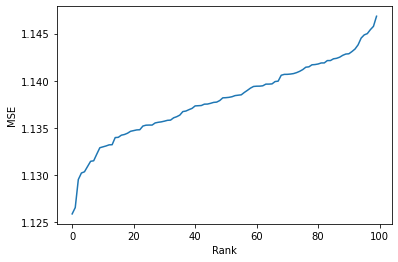

(1000, 20)


In [2]:
## Synthetic regression datasets: 1000 samples, 100 features; labels is uniform distributed in [1, 5]
X = np.random.randn(1000, 100)
y = np.random.uniform(1, 5, 1000)

### train RFT
rft = FeatureTest(loss='rmse')
rft.fit(X, y, n_bins=32, outliers=True)

plt.figure()
plt.plot(np.arange(100), np.array(list(rft.dim_loss.values())))
plt.xlabel('Rank')
plt.ylabel('MSE')
plt.show()

### Extract relevant features
selected_X = rft.transform(X, n_selected=20)
print(selected_X.shape)

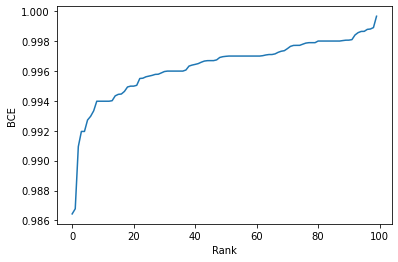

(1000, 20)


In [3]:
## Synthetic binary classification datasets: 1000 samples, 100 features
X = np.random.randn(1000, 100)
y = np.zeros(1000)
pos_idx = np.arange(1000)
np.random.shuffle(pos_idx)
y[pos_idx[:500]] = 1

### train DFT
dft = FeatureTest(loss='bce')
dft.fit(X, y, n_bins=32)

plt.figure()
plt.plot(np.arange(100), np.array(list(dft.dim_loss.values())))
plt.xlabel('Rank')
plt.ylabel('BCE')
plt.show()

### Extract relevant features
selected_X = dft.transform(X, n_selected=20)
print(selected_X.shape)

D:\git\python-feature-test\utils.py:65: RuntimeWarning: divide by zero encountered in log2
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: invalid value encountered in multiply
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: divide by zero encountered in log2
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: invalid value encountered in multiply
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: divide by zero encountered in log2
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: invalid value encountered in multiply
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: divide by zero encountered in log2
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: invalid value encountered in multiply
  lh = np.sum(-y_l * n

D:\git\python-feature-test\utils.py:68: RuntimeWarning: invalid value encountered in multiply
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: divide by zero encountered in log2
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: invalid value encountered in multiply
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: divide by zero encountered in log2
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: invalid value encountered in multiply
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: divide by zero encountered in log2
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: invalid value encountered in multiply
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: divide by zero encountered in log2
  lh = np.sum(-y_l * n

D:\git\python-feature-test\utils.py:68: RuntimeWarning: invalid value encountered in multiply
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: divide by zero encountered in log2
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: invalid value encountered in multiply
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: divide by zero encountered in log2
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: invalid value encountered in multiply
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: divide by zero encountered in log2
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: invalid value encountered in multiply
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: divide by zero encountered in log2
  rh = np.sum(-y_r * n

D:\git\python-feature-test\utils.py:68: RuntimeWarning: divide by zero encountered in log2
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: invalid value encountered in multiply
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: divide by zero encountered in log2
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: invalid value encountered in multiply
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: divide by zero encountered in log2
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: invalid value encountered in multiply
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: divide by zero encountered in log2
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: invalid value encountered in multiply
  rh = np.sum(-y_r * n

D:\git\python-feature-test\utils.py:68: RuntimeWarning: invalid value encountered in multiply
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: divide by zero encountered in log2
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:65: RuntimeWarning: invalid value encountered in multiply
  lh = np.sum(-y_l * np.log2(lp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: divide by zero encountered in log2
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: invalid value encountered in multiply
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: divide by zero encountered in log2
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: invalid value encountered in multiply
  rh = np.sum(-y_r * np.log2(rp))
D:\git\python-feature-test\utils.py:68: RuntimeWarning: divide by zero encountered in log2
  rh = np.sum(-y_r * n

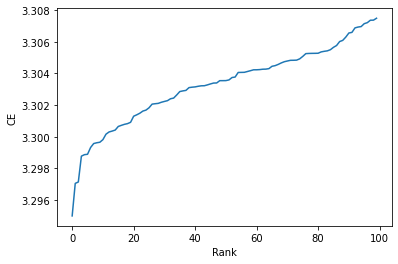

(1000, 20)


In [5]:
## Synthetic multi-class classification datasets: 1000 samples, 100 features, 10 classes
X = np.random.randn(1000, 100)
y = np.random.randint(10, size=1000)

### train DFT
dft = FeatureTest(loss='ce')
dft.fit(X, y, n_bins=32)

plt.figure()
plt.plot(np.arange(100), np.array(list(dft.dim_loss.values())))
plt.xlabel('Rank')
plt.ylabel('CE')
plt.show()

### Extract relevant features
selected_X = dft.transform(X, n_selected=20)
print(selected_X.shape)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
y_l = np.random.randint(10, size=10)
lb = LabelBinarizer()
y_l = lb.fit_transform(y_l)
lp = y_l.mean(axis=0)
print(lp)
lq = np.log2(lp)

lq = np.where(lp != 0, lq, 0)
print(lq)
lh = np.sum(-y_l * lq)